In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use("seaborn-whitegrid")

/tmp/ipykernel_32/1759593133.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


# Train set

In [5]:
def make_df(directory):
    df = pd.read_csv(directory)
    df = pd.DataFrame(df)
    return df

In [6]:
pd.set_option('display.max_rows', 4)

train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
df_train = pd.DataFrame(train)
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


MSSubClass: Identifies the type of dwelling involved in the sale.

MSZoning: Identifies the general zoning classification of the sale.

LotFrontage: Linear feet of street connected to property.

LotArea: Lot size in square feet

Street: Type of road access to property

Alley: Type of alley access to property

LotShape: General shape of property

In [7]:
nan_counts = df_train.isna().sum()


pd.set_option('display.max_rows', None) 
# Display NaN counts in each column
print(nan_counts)
pd.set_option('display.max_rows', 6) 

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [8]:
df_train.shape

(1460, 81)

In [9]:
pd.set_option('display.max_rows', None)
print(df_train.dtypes)
pd.set_option('display.max_rows', 6)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [106]:
df_train_col = df_train.drop(columns=['PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 'Alley', 'LotFrontage'])
df_train_filt = df_train_col.dropna(axis=0)

nan_counts = df_train_filt.isna().sum()


pd.set_option('display.max_rows', None) 
# Display NaN counts in each column
print(nan_counts)
pd.set_option('display.max_rows', 6) 

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [107]:
df_train_filt.shape

(1338, 75)

In [108]:
X = df_train_filt.copy()
y = X.pop("SalePrice")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [109]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

binfo_gen = mutual_info_regression(X, y)

In [110]:
binfo = binfo_gen

In [111]:
for i, feature in enumerate(X.columns):
    print(f"Feature: {feature}, MI: {binfo[i]}")

Feature: Id, MI: 0.0
Feature: MSSubClass, MI: 0.24224785911515845
Feature: MSZoning, MI: 0.1398710318419203
Feature: LotArea, MI: 0.15956717324940062
Feature: Street, MI: 0.004256069262014162
Feature: LotShape, MI: 0.08289781317787548
Feature: LandContour, MI: 0.036640738748168644
Feature: Utilities, MI: 0.007538164592043373
Feature: LotConfig, MI: 0.016268082117229632
Feature: LandSlope, MI: 0.006887662483565649
Feature: Neighborhood, MI: 0.4847859251007067
Feature: Condition1, MI: 0.029530960656016125
Feature: Condition2, MI: 0.0026050925484357723
Feature: BldgType, MI: 0.038068868926757427
Feature: HouseStyle, MI: 0.0746541644683627
Feature: OverallQual, MI: 0.5451603312350448
Feature: OverallCond, MI: 0.09735957344955892
Feature: YearBuilt, MI: 0.35652447426841594
Feature: YearRemodAdd, MI: 0.24851905110839878
Feature: RoofStyle, MI: 0.024059645418671893
Feature: RoofMatl, MI: 0.002934662451226089
Feature: Exterior1st, MI: 0.12245060762373905
Feature: Exterior2nd, MI: 0.16535166824

In [112]:
binfo_df = pd.DataFrame(binfo)
binfo_df.rename(columns = {0:'MI'}, inplace = True)
binfo_df['Features'] = X.columns

In [114]:
binfo_df

,MI,Features
0,0.000000,Id
1,0.242248,MSSubClass
2,0.139871,MSZoning
...,...,...
71,0.006853,YrSold
72,0.082998,SaleType
73,0.075299,SaleCondition


In [116]:
binfo_df = binfo_df.sort_values(by ='MI', ascending = False)
binfo_df

,MI,Features
15,0.545160,OverallQual
10,0.484786,Neighborhood
44,0.484011,GrLivArea
...,...,...
66,0.000000,3SsnPorch
43,0.000000,LowQualFinSF
37,0.000000,Heating


In [118]:
def plot_mi(df, sort_name, y_name, title):
    df = df.sort_values(by=sort_name, ascending=True)
    width = np.arange(len(df))
    tick = list(df[y_name])
    plt.barh(width, df[sort_name])
    plt.yticks(width, tick)
    plt.title(title)
    plt.show()

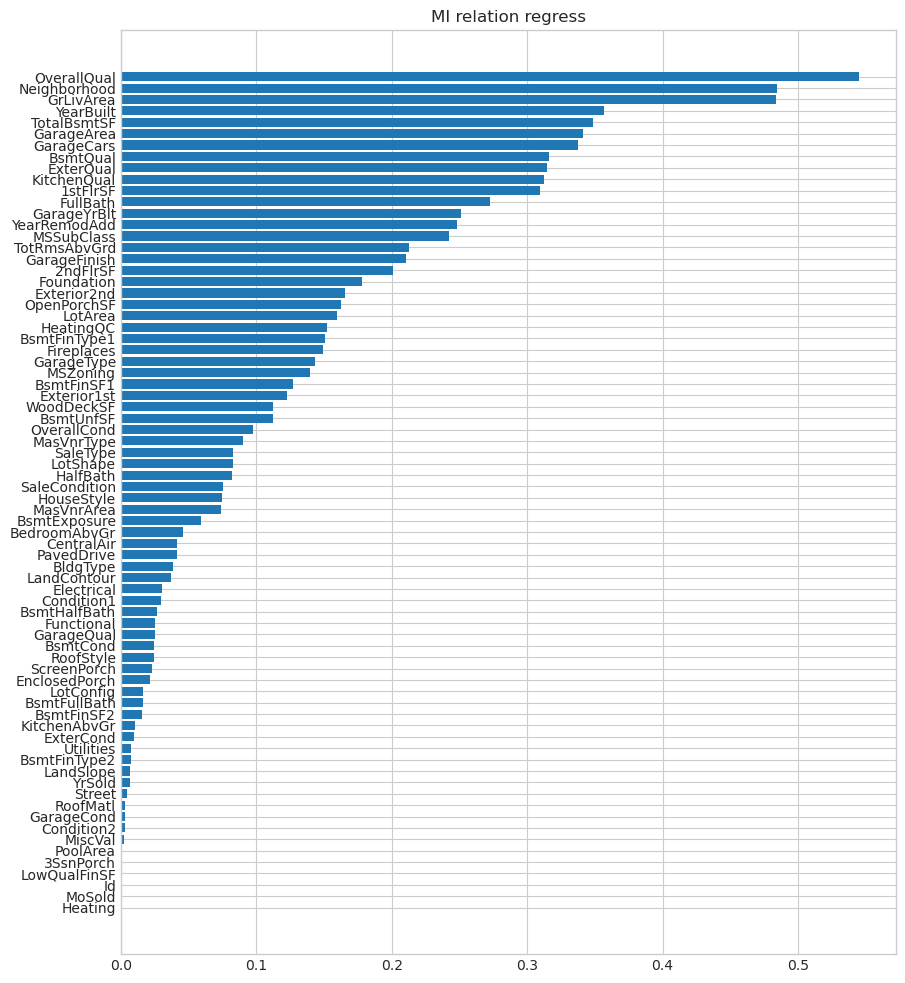

In [119]:
plt.figure(dpi=100, figsize=(10, 12))
plot_mi(binfo_df, 'MI', 'Features', "MI relation regress")

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


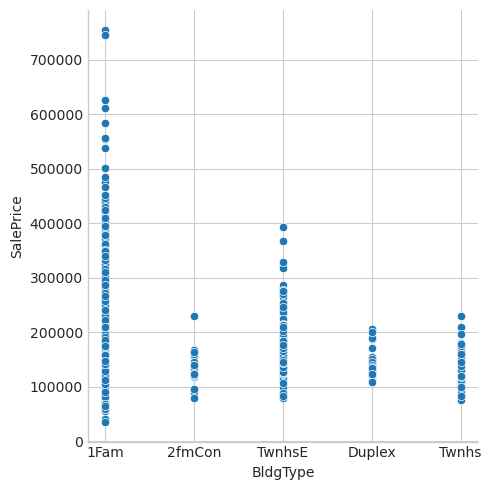

In [121]:
sns.relplot(x='BldgType', y='SalePrice', data=df_train_filt);

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


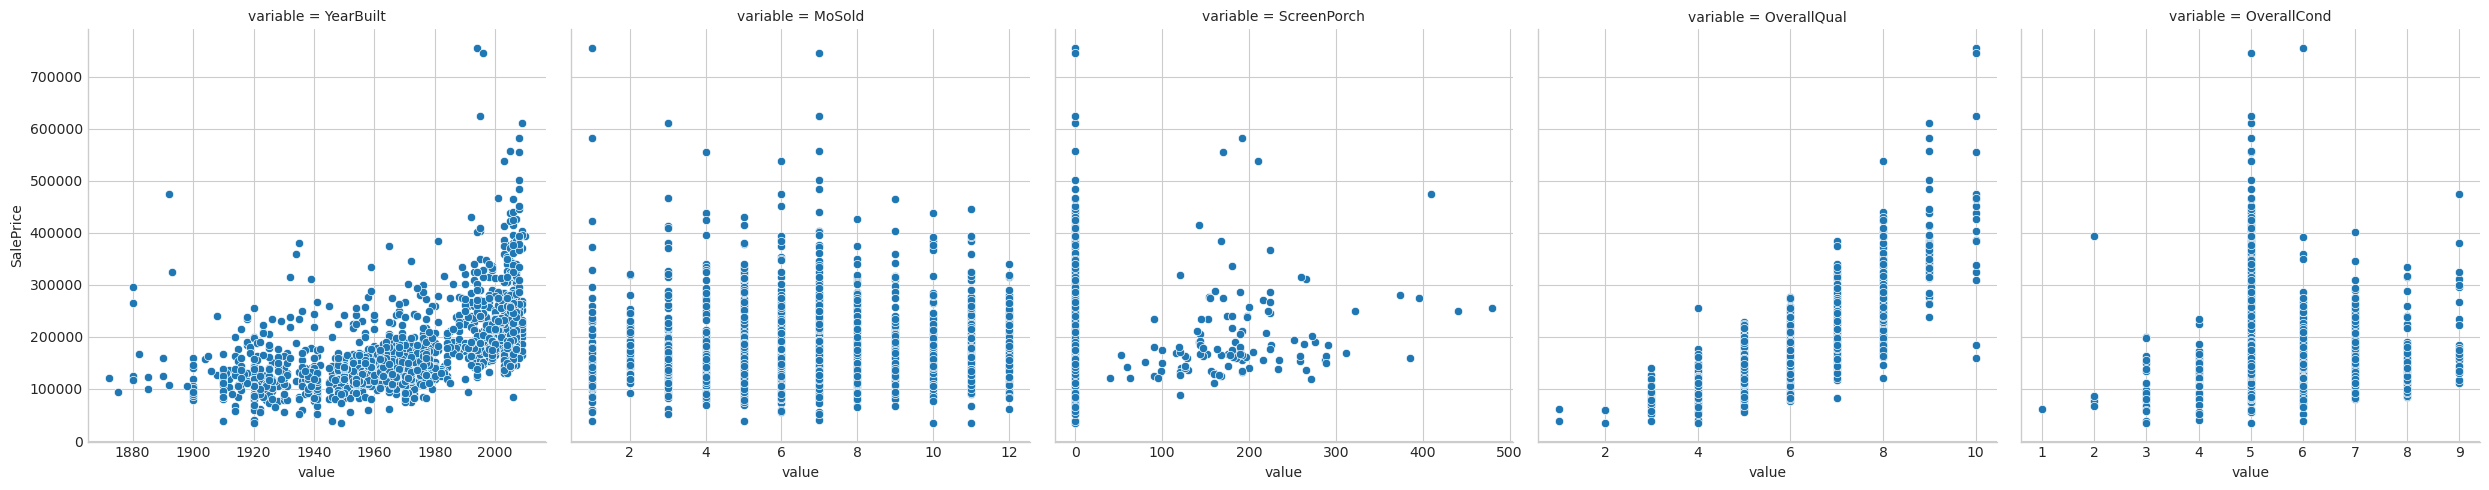

In [122]:
features = ["YearBuilt", "MoSold", "ScreenPorch", "OverallQual", "OverallCond"]
sns.relplot(
    x="value", y="SalePrice", col="variable", data=df_train.melt(id_vars="SalePrice", value_vars=features), facet_kws=dict(sharex=False),
);

In [123]:
from sklearn.preprocessing import LabelEncoder

def corre_heatmap(df):
    encoder = LabelEncoder()
    
    df_category = df.select_dtypes(include=['object']).columns
    
    
    
    for column in df_category:
        df[column] = encoder.fit_transform(df[column])
    
    correlation_matrix = df.corr()
    plt.figure(figsize=(20, 16))
    sns.heatmap(correlation_matrix, annot=False, cmap='RdBu', vmin=-1, vmax=1, linewidths=0.5)
    plt.show()

In [124]:
pd.set_option("display.max_columns", None)

X.shape

(1338, 74)

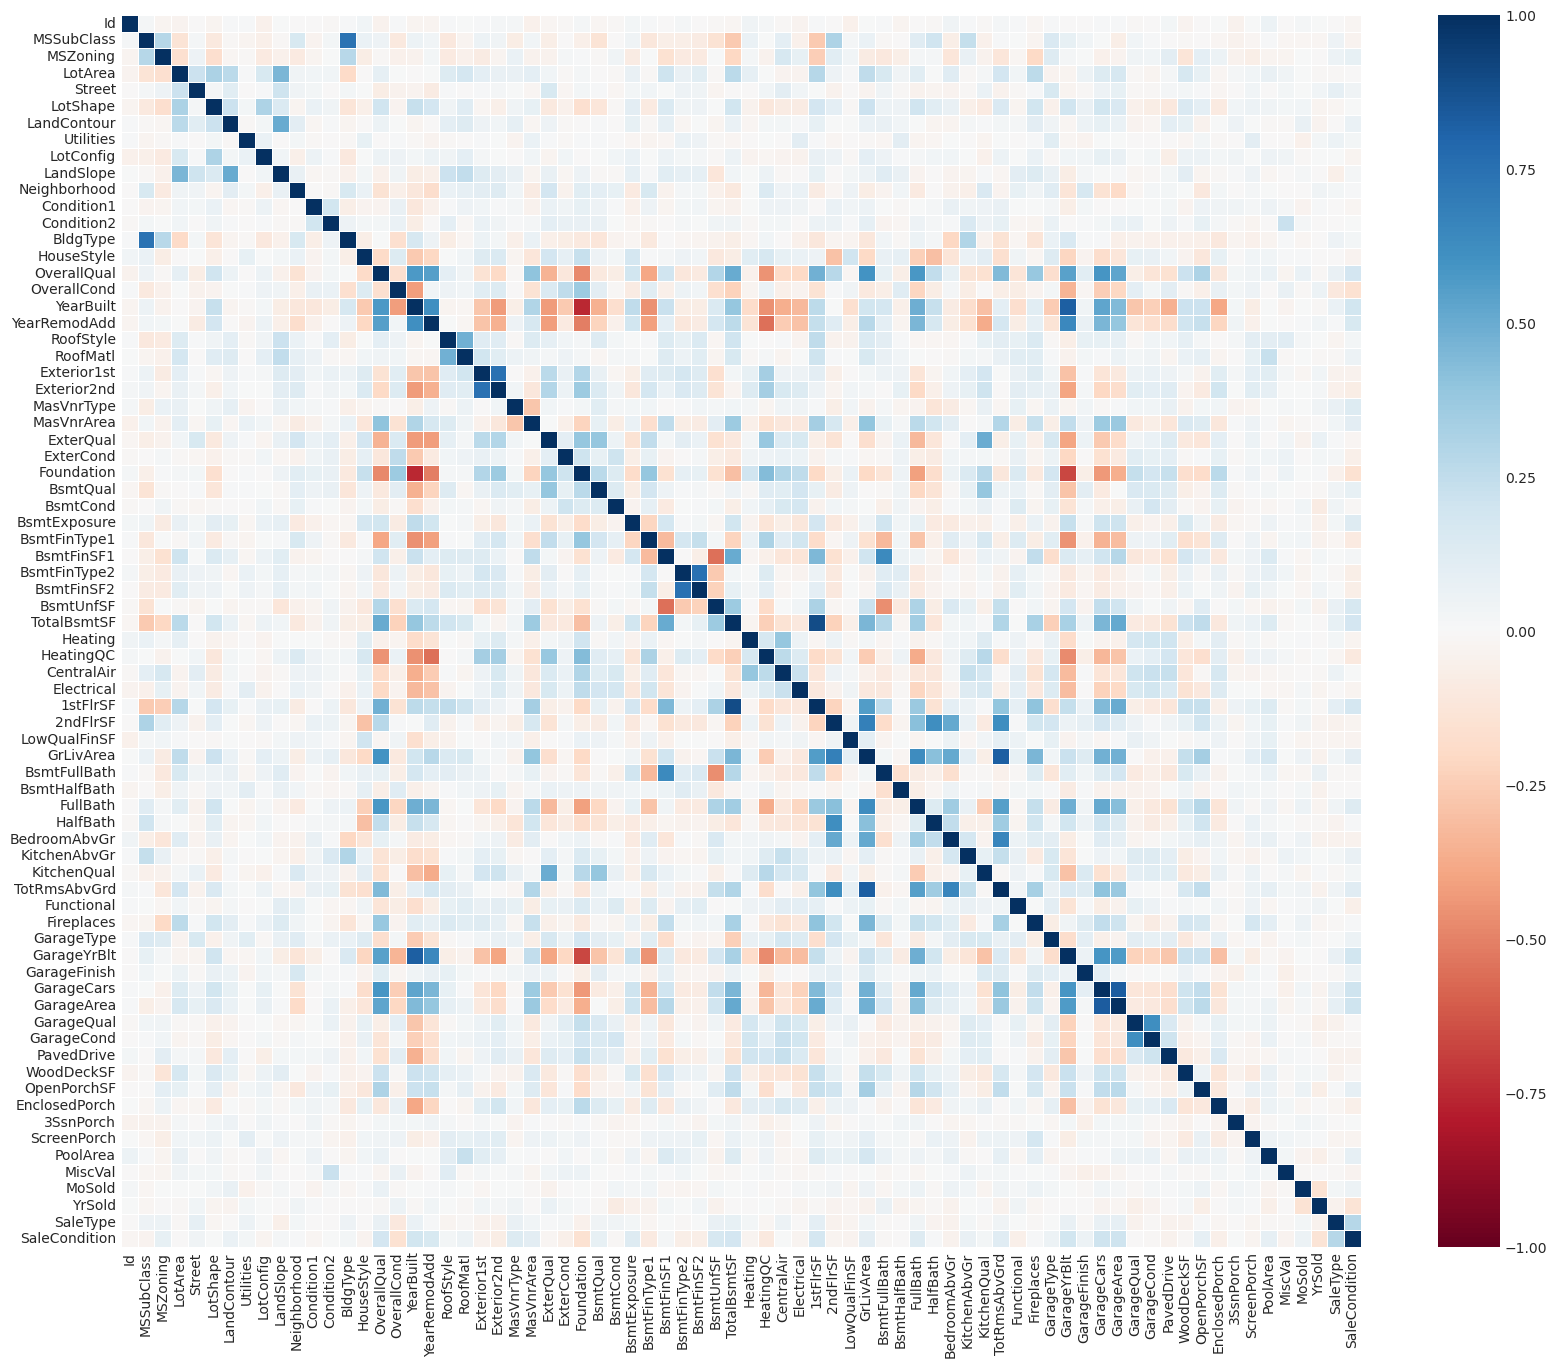

In [125]:
corre_heatmap(X)

# Test set

In [126]:
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
df_test = pd.DataFrame(test)

nan_counts = df_test.isna().sum()


pd.set_option('display.max_rows', None) 
# Display NaN counts in each column
print(nan_counts)
pd.set_option('display.max_rows', 6) 

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [127]:

df_test_filt = df_test.dropna(axis=1)

In [128]:
nan_counts = df_test_filt.isna().sum()


pd.set_option('display.max_rows', None) 
# Display NaN counts in each column
print(nan_counts)
pd.set_option('display.max_rows', 6) 

Id               0
MSSubClass       0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
ExterQual        0
ExterCond        0
Foundation       0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SaleCondition    0
dtype: int64


In [129]:
if df_train_selected_test.columns.equals(df_train_selected.columns):
    print("Both DataFrames have the same columns.")
else:
    print("The columns in the two DataFrames are different.")

NameError: name 'df_train_selected_test' is not defined

# Feature selection 

# df_train

Train a RandomForestReg and NeuralNet with...

Original feature selections.

Selected features.



## Removed features
'Id',
     'Street',
     'Utilities',
     'Condition1',
     'Condition2',
     'HouseStyle',
     'BsmtFinSF2',
     'LowQualFinSF',
     'BsmtHalfBath',
     'Functional',
     'EnclosedPorch',
     '3SsnPorch',
     'ScreenPorch',
     'PoolArea',
     'YrSold',
     'MiscVal',
     'MoSold',
     'SaleType',
     'SaleType',
     'SaleCondition'

In [130]:
def df_selected(df, filt):
    for i in filt:
        if i in df.columns:
            df = df.drop(i, axis=1)
        else:
            continue
    return df

In [131]:
exclude = ['Id',
     'Street',
     'Utilities',
     'Condition1',
     'Condition2',
     'HouseStyle',
     'BsmtFinSF2',
     'LowQualFinSF',
     'BsmtHalfBath',
     'Functional',
     'EnclosedPorch',
     '3SsnPorch',
     'ScreenPorch',
     'PoolArea',
     'YrSold',
     'MiscVal',
     'MoSold',
     'SaleType',
     'SaleType',
     'SaleCondition',
     'MSZoning',
     'LotArea',
     'LotShape',
     'LandContour',
     'LotConfig',
     'LandSlope',
     'Neighborhood',
     'RoofStyle',
     'RoofMatl',
     'Exterior1st',
     'Exterior2nd',
     'Heating',
     'BldgType']

In [132]:
df_train_selected = df_selected(df_train_filt, exclude)

In [133]:
pd.set_option('display.max_columns', None) 
df_train_selected

,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SalePrice
0,60,7,5,2003,2003,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,856,Ex,Y,SBrkr,856,854,1710,1,2,1,3,1,Gd,8,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,208500
1,20,6,8,1976,1976,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,1262,Ex,Y,SBrkr,1262,0,1262,0,2,0,3,1,TA,6,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,181500
2,60,7,5,2001,2002,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,920,Ex,Y,SBrkr,920,866,1786,1,2,1,3,1,Gd,6,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,223500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,70,7,9,1941,2006,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,877,1152,Ex,Y,SBrkr,1188,1152,2340,0,2,0,4,1,Gd,9,2,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,266500
1458,20,5,6,1950,1996,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,0,1078,Gd,Y,FuseA,1078,0,1078,1,1,0,2,1,Gd,5,0,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,142125
1459,20,5,6,1965,1965,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,136,1256,Gd,Y,SBrkr,1256,0,1256,1,1,1,3,1,TA,6,0,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,147500


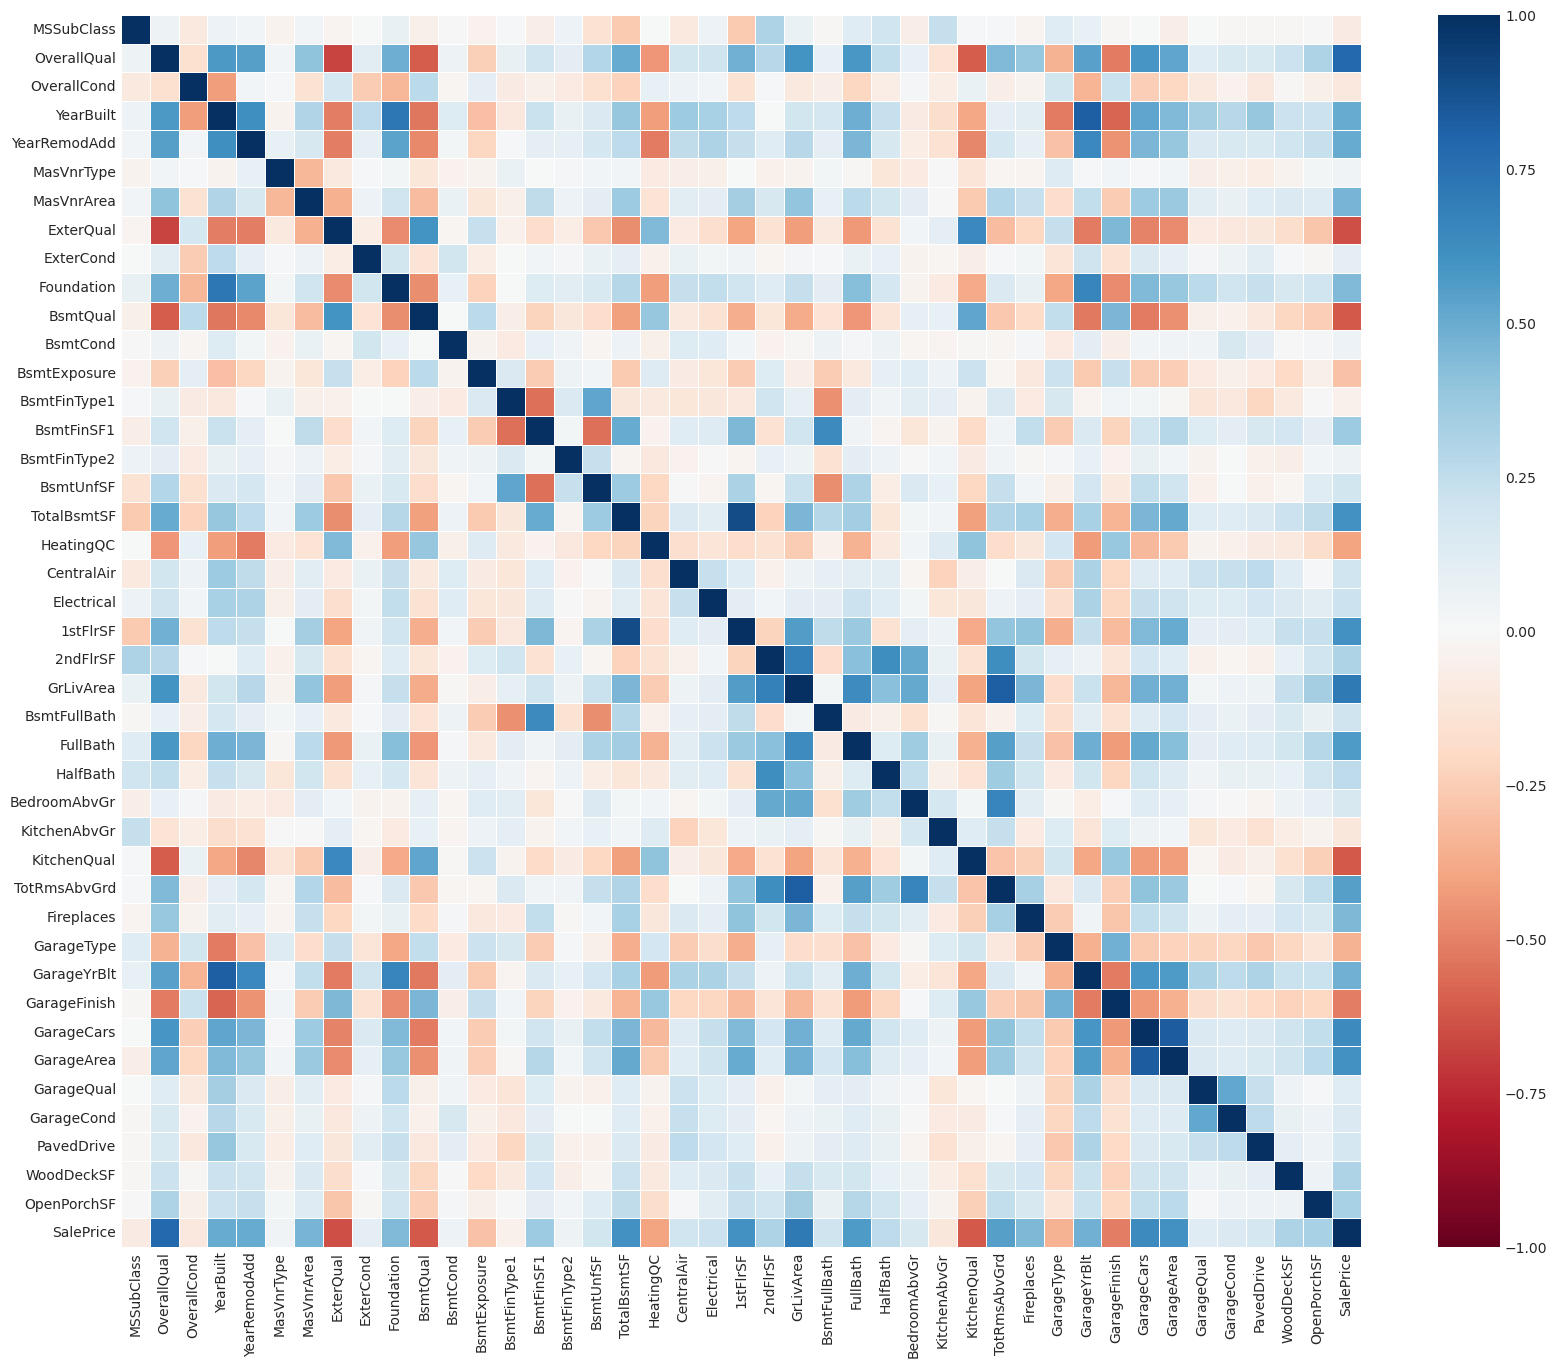

In [134]:
corre_heatmap(df_train_selected)

In [135]:
df_test_selected = df_selected(df_test_filt, exclude)
df_test_selected

,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,Foundation,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,PavedDrive,WoodDeckSF,OpenPorchSF
0,20,5,6,1961,1961,TA,TA,CBlock,TA,Y,SBrkr,896,0,896,1,0,2,1,5,0,Y,140,0
1,20,6,6,1958,1958,TA,TA,CBlock,TA,Y,SBrkr,1329,0,1329,1,1,3,1,6,0,Y,393,36
2,60,5,5,1997,1998,TA,TA,PConc,Gd,Y,SBrkr,928,701,1629,2,1,3,1,6,1,Y,212,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,20,5,7,1960,1996,TA,TA,CBlock,Ex,Y,SBrkr,1224,0,1224,1,0,4,1,7,1,Y,474,0
1457,85,5,5,1992,1992,TA,TA,PConc,TA,Y,SBrkr,970,0,970,1,0,3,1,6,0,Y,80,32
1458,60,7,5,1993,1994,TA,TA,PConc,Ex,Y,SBrkr,996,1004,2000,2,1,3,1,9,1,Y,190,48


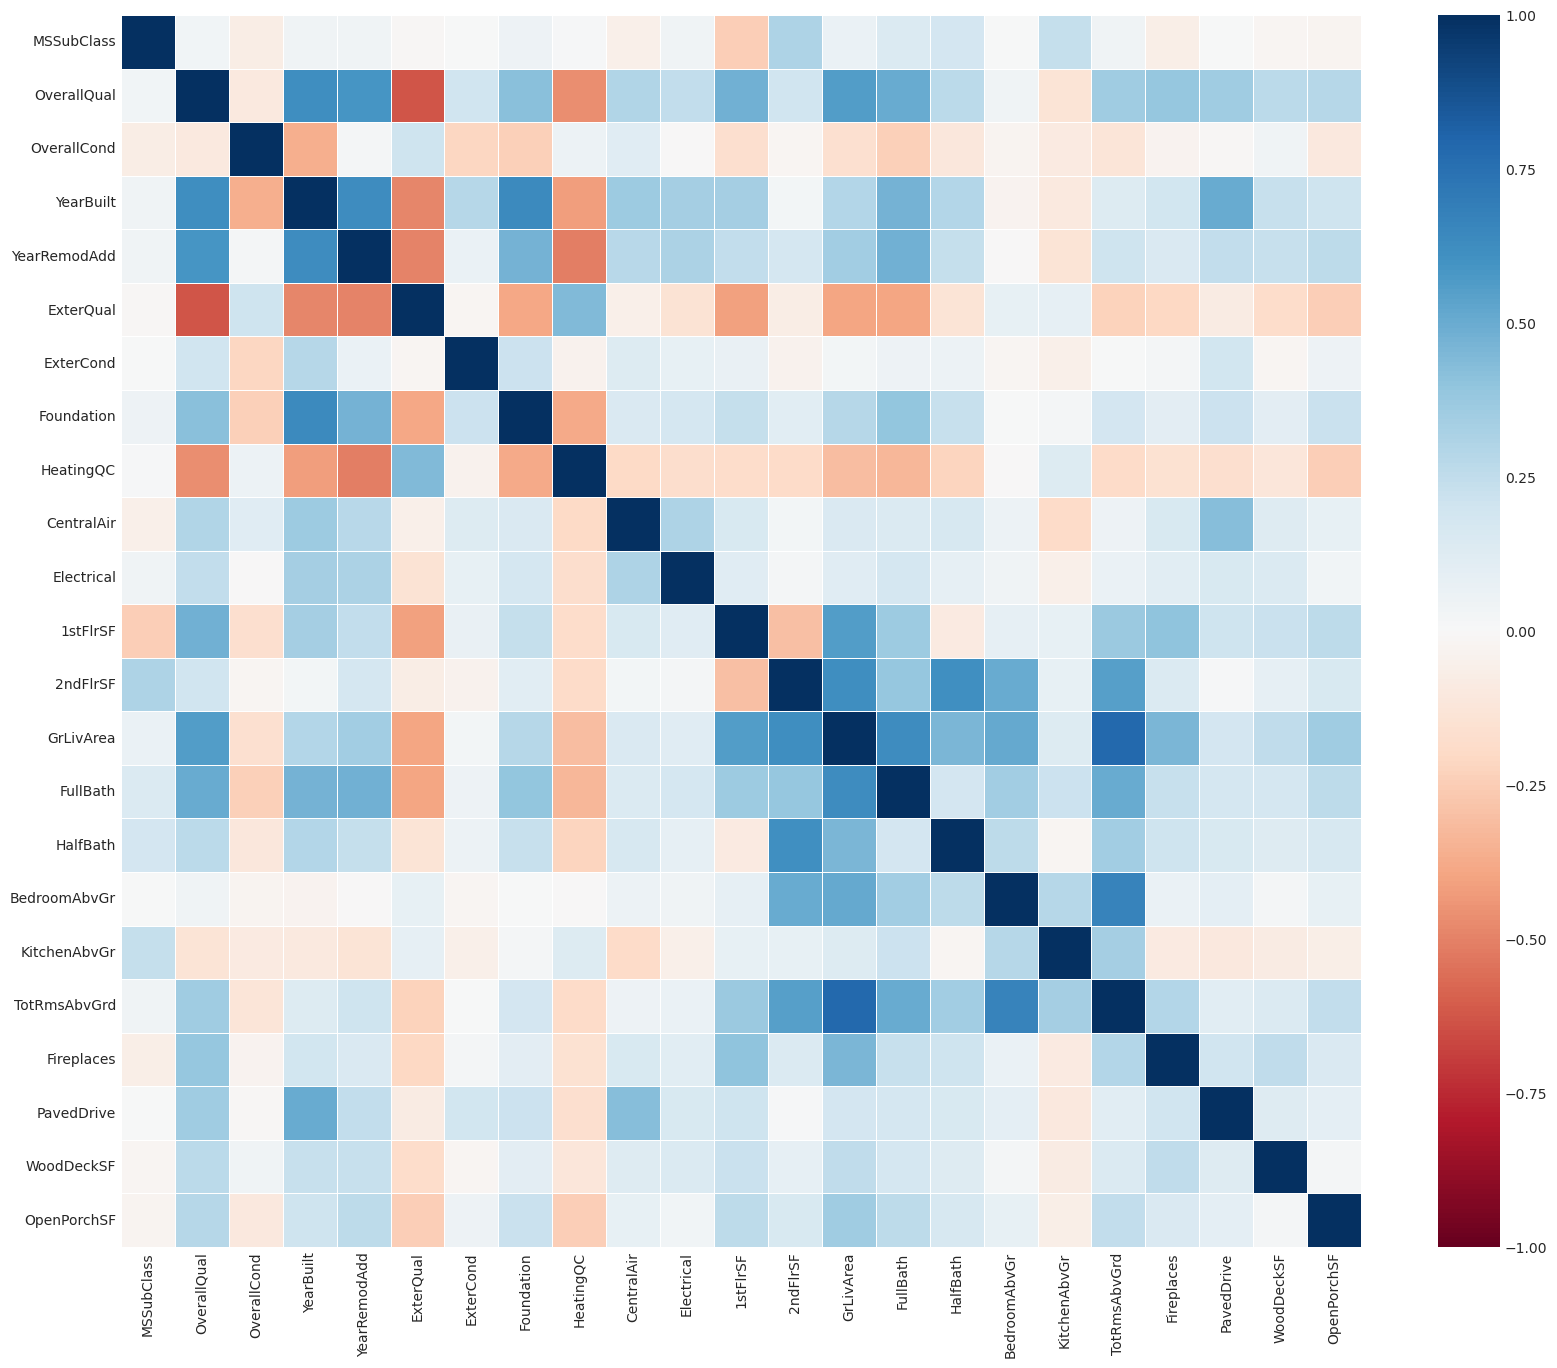

In [136]:
corre_heatmap(df_test_selected)

In [137]:
columns_only_in_df_train_selected = df_train_selected.columns.difference(df_test_selected.columns)
print("Columns only in df_train_selected:")
print(columns_only_in_df_train_selected)

# Find the columns that are in df2 but not in df1
columns_only_in_df_test_selected = df_test_selected.columns.difference(df_train_selected.columns)
print("\nColumns only in df_test_selected:")
print(columns_only_in_df_test_selected)

# Compare the common columns for differences
common_columns = df_train_selected.columns.intersection(df_test_selected.columns)

Columns only in df_train_selected:
Index(['BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFullBath', 'BsmtQual', 'BsmtUnfSF', 'GarageArea',
       'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
       'GarageYrBlt', 'KitchenQual', 'MasVnrArea', 'MasVnrType', 'SalePrice',
       'TotalBsmtSF'],
      dtype='object')

Columns only in df_test_selected:
Index([], dtype='object')


In [42]:
df_train_filt

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,Ex,Gd,Stone,275,0,877,1152,GasA,Ex,Y,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,1,252,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,TA,TA,CBlock,49,1029,0,1078,GasA,Gd,Y,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,1,240,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125
1459,1460,20,RL,9937,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,Gd,TA,CBlock,830,290,136,1256,GasA,Gd,Y,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,1,276,Y,736,68,0,0,0,0,0,6,2008,WD,Normal,147500


In [43]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_tra, y_tra, X_tes, y_tes = train_test_split(df_train_selected, 'targetvalue', test_size=0.2, random_state=24)

X_train = df_train_selected.drop(['SalePrice'], axis=1)
y_train = df_train_selected['SalePrice']

'''
X_test = df_test_selected.drop(['SalePrice'], axis=1)
y_test = df_test_selected['SalePrice']
'''

KeyError: "['SalePrice'] not found in axis"

In [ ]:
y_train.nunique()

In [ ]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)